# AVALIAÇÃO 5

## Exercício 6
Completa as implementações dos modelos RidgeRegression e LogisticRegression

6.1) Adiciona aos modelos anteriores o atributo (parâmetro estimado) cost_history .
O cost_history deve ser um dicionário.
Durante as iterações do Gradient Descent, computa a função de custo self.cost dataset )) e armazena o resultado no dicionário cost_history.
A chave deve ser o número da iteração e o valor deve ser o custo nessa iteração.

6.2) Realiza um gráfico (line plot ) que permita visualizar o comportamento do custo em função do número de iterações.
O eixo Y deve conter o valor de custo enquanto o eixo X deve conter as iterações. Podes usar o dicionário cost_history .
Usa o dataset cpu.csv, o package matplotlib e um jupyter notebook para visualizares o comportamento da função de custo (J) no modelo RidgeRegression.
Usa o dataset breast bin.csv, o package matplotlib e um jupyter notebook para visualizares o comportamento da função de custo (J) no modelo LogisticRegression

NOTA: Deves usar o sklearn.preprocessing.StandardScaler para standardizar os dois datasets

NOTA: Deves usar um número máximo de iterações superior a 1000 (max_iter = 2000)

6.3) Altera agora o algoritmo de Gradient Descent. Este algoritmo deve parar quando o valor da função de custo ( J/ self.cost ) não se altera.
 Quando a diferença entre o custo da iteração anterior e o custo da iteração atual for inferior a um determinado valor deves parar o Gradient Descent No caso do RidgeRegression o critério de paragem deve ser uma diferença inferior a 1.

No caso do LogisticRegression , o critério de paragem deve ser uma diferença inferior a 0.0001.
 Deves usar o dicionário cost_history para obteres o custo da iteração anterior e calcular a diferença da seguinte forma: cost_history (i 1) cost_history.

 Usa o dataset cpu.csv, o package matplotlib e um jupyter notebook para visualizares o comportamento da função de custo (J) no modelo RidgeRegression

 Usa o dataset breast bin.csv, o package matplotlib e um jupyter notebook para visualizares o comportamento da função de custo (J) no modelo LogisticRegression

NOTA: Deves usar o sklearn.preprocessing.StandardScaler para standardizar os dois datasets

NOTA: Deves usar um número máximo de iterações superior a 1000
max_iter = 2000

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from si.io.csv import read_csv
from si.model_selection.split import train_test_split
from si.linear_model.ridge_regression import RidgeRegression
from si.linear_model.logistic_regression import LogisticRegression

## RidgeRegression

In [2]:
#RidgeRegression
cpu = read_csv('C:/Users/Carolina/Documents/GitHub/si/datasets/cpu.csv', sep=',',features=True, label=True)

In [3]:
import sklearn
from sklearn import preprocessing
cpu.X = preprocessing.StandardScaler().fit_transform(cpu.X)

In [4]:
# split dataset
train_dataset, test_dataset = train_test_split(cpu)
test_dataset.y

array([ 274,   30,   22,  915,   16,  326,   72,    6, 1144,  208,   65,
        130,   52,   45,   35,   36,   51,   31,  100,  132,   50,   60,
        110,   18,   11,   50,   69,   27,   19,   41,  248,   32,   45,
         26,   16,   26,   67,  465,   38,   17,  307], dtype=int64)

In [5]:
train_dataset.y

array([  34,  214,  465, 1150,   32,  510,   40,   24,   71,   23,   11,
         24,   27,  120,   54,   40,   17,  259,  318,   93,   71,  277,
         70,   84,   42,   38,  368,   92,  208,   77,   52,   76,  185,
         66,   24,   49,   32,   45,   40,   75,   36,   20,   33,   62,
        140,   12,  220,   53,   18,   56,   40,  141,   29,   60,   20,
         66,   22,   61,   50,   37,   63,   40,   21,  116,  367,   27,
         25,   12,   86,  132,   32,   34,  370,  100,   70,   50,   38,
         36,  143,  510,   25,  198,   18,   22,   62,   42,  144,   72,
         30,   36,   18,   76,   12,  214,   38,   26,   30,   20,  237,
         24,   60,   74,  172,   32,   36,   32,  188,   46,  114,   62,
         16,  106,  489,   22,  189,   16,   58,  173,   66,  636,  138,
         20,  109,   16,   28,   22,   33,   45,   50,  405,  144,   26,
         11,   24,   50,   46,  212,   14,   40,  134,   33,   12,   21,
         14,   80,   29,    8,  397,  269,  138,  1

In [6]:
ridge = RidgeRegression(max_iter=2000, adaptive=False)
ridge.fit(train_dataset)
ridge.alpha

0.001

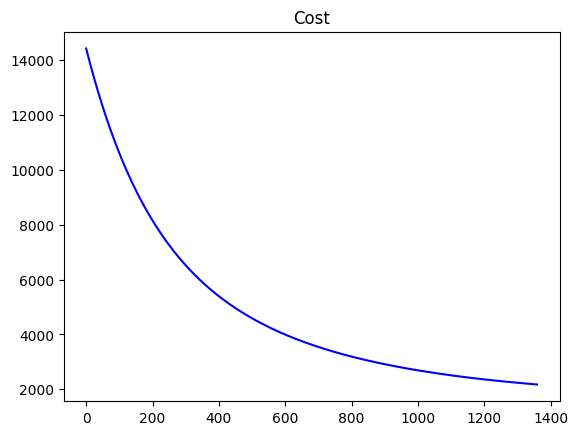

In [7]:
plt.plot(list(ridge.cost_history.keys()), list(ridge.cost_history.values()), '-', color = 'blue')
plt.title('Cost')
plt.show()

In [8]:
ridge = RidgeRegression(max_iter=2000, adaptive=True)
ridge.fit(train_dataset)
ridge.alpha

Adaptive


1.0959046745042015e-196

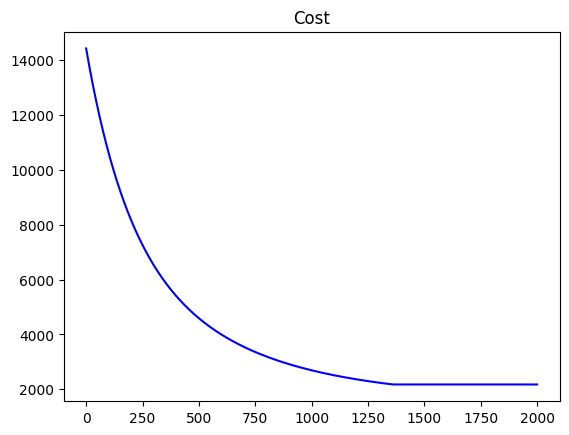

In [9]:
plt.plot(list(ridge.cost_history.keys()), list(ridge.cost_history.values()), '-', color = 'blue')
plt.title('Cost')
plt.show()

In [10]:
ridge.score(test_dataset)

4633.694566456487

In [11]:
ridge.cost(test_dataset)

4701.98049224086

In [12]:
ridge = RidgeRegression(max_iter=2000)
ridge.fit(train_dataset)
ridge.predict(test_dataset)

array([128.26453523, -15.65693537, -10.02502879, 574.36226915,
       -12.31507769, 253.64791387,  21.21110488, -28.14456071,
       763.50700723, 256.32487007,  87.12304095, 103.35873423,
        23.8228405 ,  24.77754089,  64.92402347,   9.65085393,
       120.30651647,  -1.29310913, 161.76737614,  85.08005687,
        51.11614466,  27.99404714, 127.61448727, -21.64761761,
       -41.65875749,  16.50940913, -27.80634248,   2.37414919,
        -3.61143797,  59.12954555, 255.32553266,  21.09183392,
         2.6752332 , -19.0916076 , -33.13838134,  24.14101178,
        10.6337403 , 350.28653503, 151.57111915, -12.18611573,
       420.55222382])

## logisticRegression

In [13]:
#LogisticRegression
breast_bin = read_csv('C:/Users/Carolina/Documents/GitHub/si/datasets/breast-bin.csv', sep=',',features=True, label=True)

In [14]:
import sklearn
from sklearn import preprocessing
breast_bin.X = preprocessing.StandardScaler().fit_transform(breast_bin.X)

In [15]:
train_dataset, test_dataset = train_test_split(breast_bin)
test_dataset.y

array([0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1.])

In [16]:
log_reg = LogisticRegression()
log_reg.fit(train_dataset)
predictions = log_reg.predict(test_dataset)
predictions

array([1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1.])

In [17]:
log_reg.score(test_dataset)

0.9856115107913669

In [18]:
log_reg.cost(test_dataset)

0.5674846321095116

In [25]:
lg = LogisticRegression(max_iter=2000, adaptive=False)
lg.fit(train_dataset)
lg.alpha

0.001

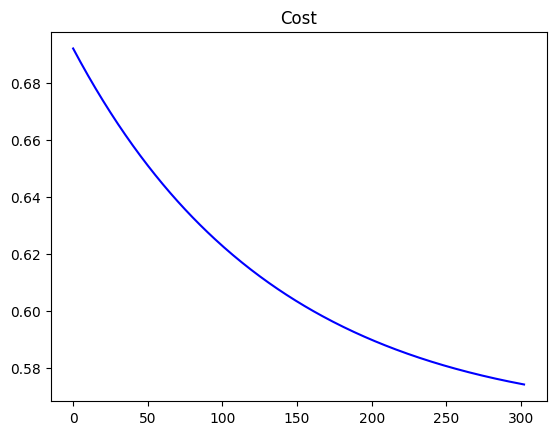

In [26]:
plt.plot(list(lg.cost_history.keys()), list(lg.cost_history.values()), '-', color = 'blue')
plt.title('Cost')
plt.show()

In [27]:
lg = LogisticRegression(max_iter=2000, adaptive=True)
lg.fit(train_dataset)
lg.alpha

adaptative


0.0

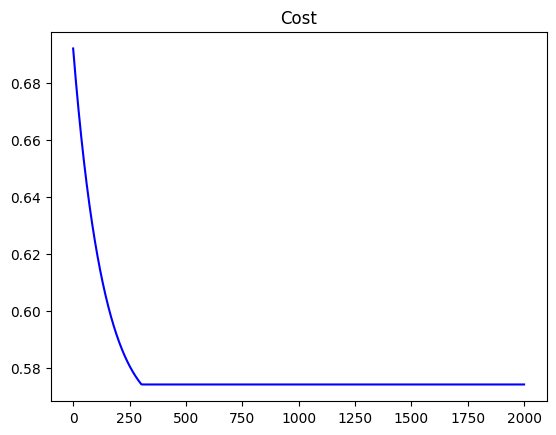

In [28]:
plt.plot(list(lg.cost_history.keys()), list(lg.cost_history.values()), '-', color = 'blue')
plt.title('Cost')
plt.show()

In [21]:
breast_bin_train, breast_bin_test = train_test_split(breast_bin)

# fit the model
model_b = LogisticRegression(max_iter=2000)
model_b._adaptive_fit(breast_bin_train)

# get coefs
print(f"Parameters: {model_b.theta}")

# predict
y_pred_ = model_b.predict(breast_bin_test)
print(f"Predictions: {y_pred_}")

# compute the score
score = model_b.score(breast_bin_test)
print(f"Score: {score}")

# compute the cost
cost = model_b.cost(breast_bin_test)
print(f"Cost: {cost}")

Parameters: [0.05252301 0.05515439 0.05325629 0.04532076 0.04227518 0.06120041
 0.05001127 0.04531888 0.02168568]
Predictions: [1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.]
Score: 0.9856115107913669
Cost: 0.5673757410041168
